<a href="https://colab.research.google.com/github/sindhu7-zero/fish_classifier/blob/main/Fish_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp '/content/drive/MyDrive/fish_project/fish_dataset.zip' /content/
!unzip '/content/fish_dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KF3D8XIXVZOD.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KWS8S1W9I9PG.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LRPEM4RGWRY7.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/ZHYP7L0380A5.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LA6K9A1Z300T.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/DSTJ0FNZ17NI.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/8HEN19LAPJGS.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/7UQQICO4NVWK.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/OKKCEF9K4K64.jpg  
  in

In [ ]:
import os

# Rename the weird folder to something simple
os.rename(
    '/content/images.cv_jzk6llhf18tm3k0kyttxz',
    '/content/fish_project'
)
print("✅ Renamed to /content/fish_project")

✅ Renamed to /content/fish_project


In [ ]:
!ls '/content/fish_project/data'

test  train  val


In [ ]:
train_path = '/content/fish_project/data/train'
val_path = '/content/fish_project/data/val'
test_path = '/content/fish_project/data/test'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#load data
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [ ]:
model=Sequential()

# Block 1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 4
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train_gen.class_indices),activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,404,683 (169.39 MB)

 Trainable params: 44,403,211 (169.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 39s 134ms/step - accuracy: 0.5777 - loss: 1.4605 - val_accuracy: 0.1520 - val_loss: 12.0096
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.8737 - loss: 0.3776 - val_accuracy: 0.1026 - val_loss: 12.9524
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.9389 - loss: 0.1975 - val_accuracy: 0.4579 - val_loss: 4.4626
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.9677 - loss: 0.1123 - val_accuracy: 0.6960 - val_loss: 1.7931
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9769 - loss: 0.0783 - val_accuracy: 0.7821 - val_loss: 1.3964
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9830 - loss: 0.0587 - val_accuracy: 0.7875 - val_loss: 1.5542
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9900 - loss: 0.0443 - val_accuracy: 0.8526 - val_loss: 1.1440
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9917 - loss: 0.0363 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.2f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.8457 - loss: 3.1914
✅ Test Accuracy: 0.89


In [ ]:
model.save('/content/fish_classifier.h5')

In [ ]:
!cp /content/fish_classifier.h5 "/content/drive/MyDrive/fish_project/"


In [ ]:
!ls "/content/drive/MyDrive/fish_project/"


fish_classifier.h5  fish_dataset.zip


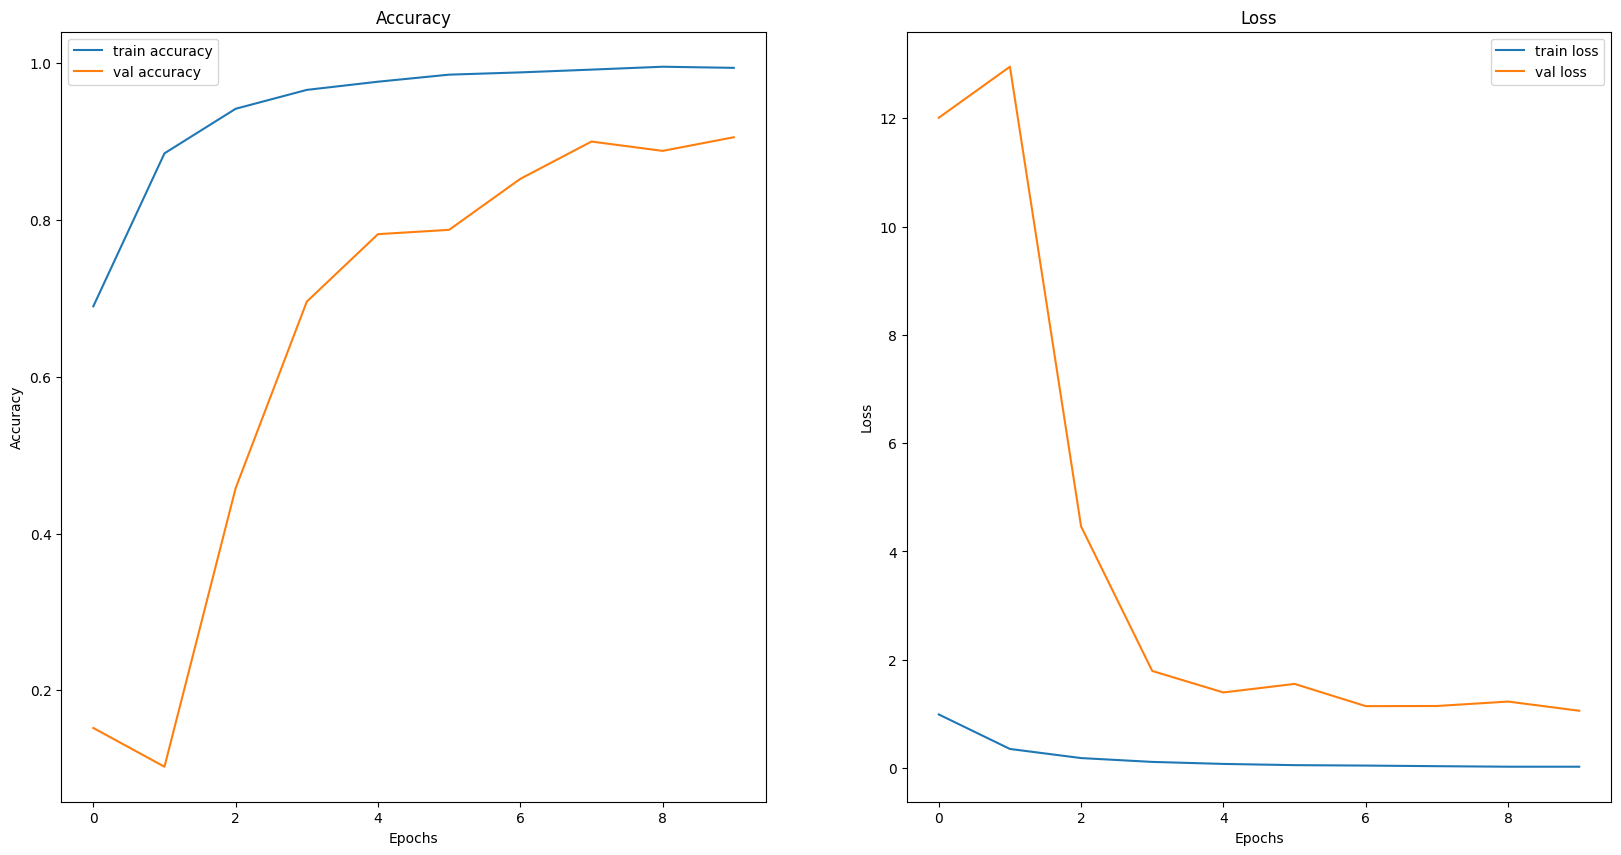

In [ ]:
# Visuvalaisation of the model
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(model.history.history['accuracy'],label='train accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(model.history.history['loss'],label='train loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_path = '/content/fish_project/data/train'
val_path = '/content/fish_project/data/val'
test_path = '/content/fish_project/data/test'  # Optional if you have a test set

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Number of classes
num_classes = len(train_gen.class_indices)
print(f"✅ Found {num_classes} classes")


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
✅ Found 11 classes


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, ResNet50, EfficientNetB0, DenseNet121, VGG16

# List of models to try
model_configs = [
    ("MobileNetV2", MobileNetV2),
    ("ResNet50", ResNet50),
    ("NASNetMobile", EfficientNetB0),
    ("DenseNet121", DenseNet121),
    ("VGG16", VGG16)
]

results = {}

for name, BaseModel in model_configs:
    print(f"\n{'='*50}")
    print(f"🚀 Training {name}...")
    print(f"{'='*50}")

    # ✅ Clear previous session to avoid duplicate input tensor errors
    tf.keras.backend.clear_session()

    # Build a fresh base model
    base_model = BaseModel(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False  # Freeze base layers

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train (5 epochs for comparison)
    history = model.fit(
        train_gen,
        epochs=5,
        validation_data=val_gen,
        verbose=1
    )

    # Evaluate on full validation set
    val_loss, val_acc = model.evaluate(val_gen, verbose=0)
    results[name] = val_acc

    # Save model
    model.save(f'/content/{name}_fish_classifier.h5')
    print(f"✅ {name} - Validation Accuracy: {val_acc:.4f}")

print("\n🏁 All models trained. Final validation accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")



🚀 Training MobileNetV2...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 121s 531ms/step - accuracy: 0.4723 - loss: 1.6329 - val_accuracy: 0.9414 - val_loss: 0.2536
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 396ms/step - accuracy: 0.8798 - loss: 0.3749 - val_accuracy: 0.9533 - val_loss: 0.1686
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 406ms/step - accuracy: 0.9181 - loss: 0.2478 - val_accuracy: 0.9652 - val_loss: 0.1095
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 400ms/step - accuracy: 0.9368 - loss: 0.1948 - val_accuracy: 0.9725 - val_loss: 0.0928
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 399ms/step - accuracy: 0.9455 - loss: 0.1688 - val_accuracy: 0.9753 - val_loss: 0.0812


✅ MobileNetV2 - Validation Accuracy: 0.9753

🚀 Training ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 109s 492ms/step - accuracy: 0.1285 - loss: 2.5807 - val_accuracy: 0.2152 - val_loss: 2.2376
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 435ms/step - accuracy: 0.1746 - loss: 2.2769 - val_accuracy: 0.2335 - val_loss: 2.1883
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 427ms/step - accuracy: 0.1959 - loss: 2.2021 - val_accuracy: 0.1987 - val_loss: 2.1543
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 427ms/step - accuracy: 0.2006 - loss: 2.1928 - val_accuracy: 0.1777 - val_loss: 2.1028
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 429ms/step - accuracy: 0.2148 - loss: 2.1559 - val_accuracy: 0.2454 - val_loss: 2.0812


✅ ResNet50 - Validation Accuracy: 0.2454

🚀 Training EfficientNetB0...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 133s 559ms/step - accuracy: 0.1380 - loss: 2.3729 - val_accuracy: 0.1712 - val_loss: 2.3151
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 406ms/step - accuracy: 0.1514 - loss: 2.3402 - val_accuracy: 0.1712 - val_loss: 2.3241
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 405ms/step - accuracy: 0.1501 - loss: 2.3372 - val_accuracy: 0.1712 - val_loss: 2.3442
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 412ms/step - accuracy: 0.1574 - loss: 2.3360 - val_accuracy: 0.1712 - val_loss: 2.3225
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 403ms/step - accuracy: 0.1530 - loss: 2.3374 - val_accuracy: 0.1712 - val_loss: 2.3261


✅ EfficientNetB0 - Validation Accuracy: 0.1712

🚀 Training DenseNet121...
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 148s 623ms/step - accuracy: 0.3432 - loss: 2.1434 - val_accuracy: 0.9277 - val_loss: 0.4409
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 86s 442ms/step - accuracy: 0.7830 - loss: 0.6755 - val_accuracy: 0.9469 - val_loss: 0.2555
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 432ms/step - accuracy: 0.8489 - loss: 0.4760 - val_accuracy: 0.9689 - val_loss: 0.1819
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 429ms/step - accuracy: 0.8774 - loss: 0.3890 - val_accuracy: 0.9817 - val_loss: 0.1275
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 87s 447ms/step - accuracy: 0.8809 - loss: 0.3464 - val_accuracy: 0.9835 - val_loss: 0.1137


✅ DenseNet121 - Validation Accuracy: 0.9835

🚀 Training VGG16...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 122s 542ms/step - accuracy: 0.1938 - loss: 2.3102 - val_accuracy: 0.6026 - val_loss: 1.7589
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 474ms/step - accuracy: 0.4267 - loss: 1.7801 - val_accuracy: 0.6465 - val_loss: 1.4944
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 94s 483ms/step - accuracy: 0.5489 - loss: 1.5497 - val_accuracy: 0.7024 - val_loss: 1.3248
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 475ms/step - accuracy: 0.5925 - loss: 1.4157 - val_accuracy: 0.7647 - val_loss: 1.1861
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 478ms/step - accuracy: 0.6266 - loss: 1.3123 - val_accuracy: 0.7491 - val_loss: 1.0953


✅ VGG16 - Validation Accuracy: 0.7491

🏁 All models trained. Final validation accuracies:
MobileNetV2: 0.9753
ResNet50: 0.2454
EfficientNetB0: 0.1712
DenseNet121: 0.9835
VGG16: 0.7491



🏆 Final Validation Accuracies:
DenseNet121     : 0.9835
MobileNetV2     : 0.9753
VGG16           : 0.7491
ResNet50        : 0.2454
EfficientNetB0  : 0.1712


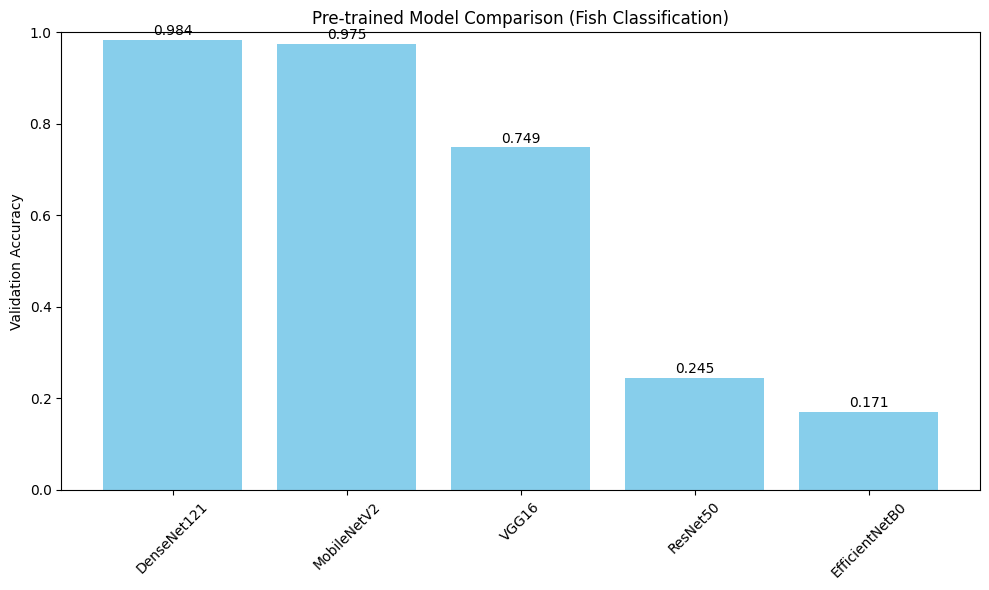

In [ ]:
import matplotlib.pyplot as plt

# Sort by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\n🏆 Final Validation Accuracies:")
for name, acc in sorted_results:
    print(f"{name:15} : {acc:.4f}")

# Plot
names = [r[0] for r in sorted_results]
accs = [r[1] for r in sorted_results]

plt.figure(figsize=(10, 6))
plt.bar(names, accs, color='skyblue')
plt.title('Pre-trained Model Comparison (Fish Classification)')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, v in enumerate(accs):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()

In [ ]:
!cp /content/DenseNet121_fish_classifier.h5 "/content/drive/MyDrive/fish_project/"

In [ ]:
!cp /content/EfficientNetB0_fish_classifier.h5 "/content/drive/MyDrive/fish_project/"

In [ ]:
!cp /content/MobileNetV2_fish_classifier.h5 "/content/drive/MyDrive/fish_project/"

In [ ]:
!cp /content/ResNet50_fish_classifier.h5 "/content/drive/MyDrive/fish_project/"

In [ ]:
!cp /content/VGG16_fish_classifier.h5 "/content/drive/MyDrive/fish_project/"

In [ ]:
!ls "/content/drive/MyDrive/fish_project/"

DenseNet121_fish_classifier.h5	   MobileNetV2_fish_classifier.h5
EfficientNetB0_fish_classifier.h5  ResNet50_fish_classifier.h5
fish_classifier.h5		   VGG16_fish_classifier.h5
fish_dataset.zip


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Upload a single image
print("📤 Please upload a fish image (e.g., .jpg, .png)")
uploaded = files.upload()

# Get the filename (only one file expected)
img_path = list(uploaded.keys())[0]
print(f"✅ Uploaded: {img_path}")

📤 Please upload a fish image (e.g., .jpg, .png)


Saving fish.jpeg to fish.jpeg
✅ Uploaded: fish.jpeg


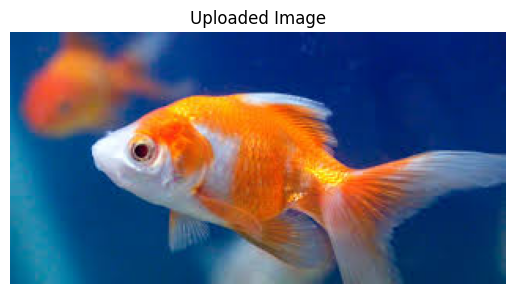

Image shape after preprocessing: (1, 224, 224, 3)


In [ ]:
# Load and display the image
img = Image.open(img_path).convert('RGB')  # Ensure 3 channels
plt.imshow(img)
plt.title("Uploaded Image")
plt.axis('off')
plt.show()

# Resize and preprocess
img_resized = img.resize((224, 224))
img_array = np.array(img_resized) / 255.0  # Normalize to [0,1]
img_batch = np.expand_dims(img_array, axis=0)  # Add batch dimension

print("Image shape after preprocessing:", img_batch.shape)  # Should be (1, 224, 224, 3)

In [ ]:
# Load the saved model (replace with your best one)
best_model_path = '/content/DenseNet121_fish_classifier.h5'  # or 'fish_classifier.h5' for your CNN
model = tf.keras.models.load_model(best_model_path)

# Get class labels (must match training order!)
class_labels = list(train_gen.class_indices.keys())  # e.g., ['betta', 'goldfish', 'tuna']
print("Classes:", class_labels)

Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [ ]:
# Predict
predictions = model.predict(img_batch)
predicted_class_idx = np.argmax(predictions[0])
confidence = predictions[0][predicted_class_idx]
predicted_label = class_labels[predicted_class_idx]

# Display result
print(f"\n🔍 Prediction: {predicted_label}")
print(f"🎯 Confidence: {confidence:.4f} ({confidence*100:.2f}%)")

# Optional: Show top 3 predictions
top_3_idx = np.argsort(predictions[0])[::-1][:3]
print("\nTop 3 predictions:")
for i, idx in enumerate(top_3_idx):
    print(f"  {i+1}. {class_labels[idx]}: {predictions[0][idx]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step

🔍 Prediction: animal fish
🎯 Confidence: 0.9971 (99.71%)

Top 3 predictions:
  1. animal fish: 0.9971
  2. fish sea_food red_mullet: 0.0018
  3. fish sea_food shrimp: 0.0003
